In [1]:
import cv2
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt

In [6]:
img1=cv2.imread("../img/forest2.jpg")
img2=cv2.imread("../img/DMAX_Logo.jpg")

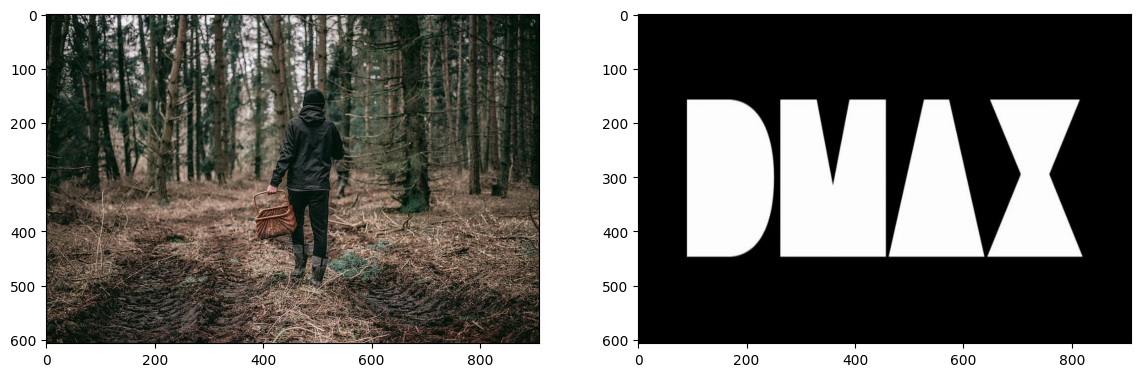

In [14]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
# BGR to RGB [..., ::-1]
plt.imshow(img1[..., ::-1])
plt.subplot(1, 2, 2)
plt.imshow(img2[..., ::-1])

In [15]:
width,height,_=img1.shape

In [16]:
img2=cv2.resize(img2,[height,width])

In [17]:
thresh=200
imgThresh = (img2 >= thresh).astype(np.uint8) * 255

In [18]:
pix_blur = (50,50,1)
k = np.ones(pix_blur) / float(pix_blur[0]*pix_blur[1])
B = ndimage.convolve(img1, k, mode='mirror')
mask1=cv2.bitwise_and(imgThresh,img1)
mask2=cv2.bitwise_and(cv2.bitwise_not(imgThresh),B+50)
result=cv2.bitwise_or(mask1,mask2)

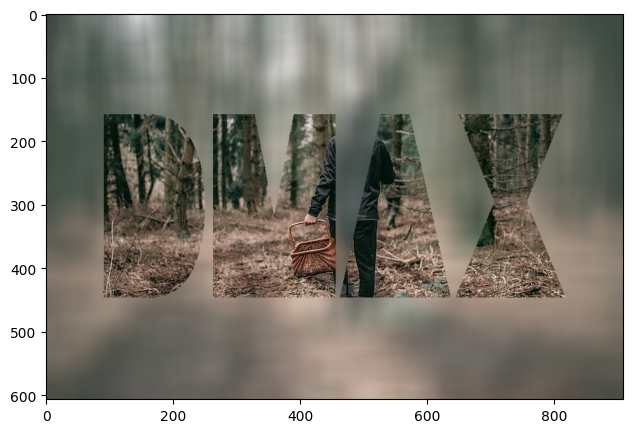

In [19]:
plt.figure(figsize=(10, 5))
plt.imshow(result[..., ::-1])